In [69]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [70]:
#Create DataFrame
happy_df = pd.read_csv('data_clean.csv')

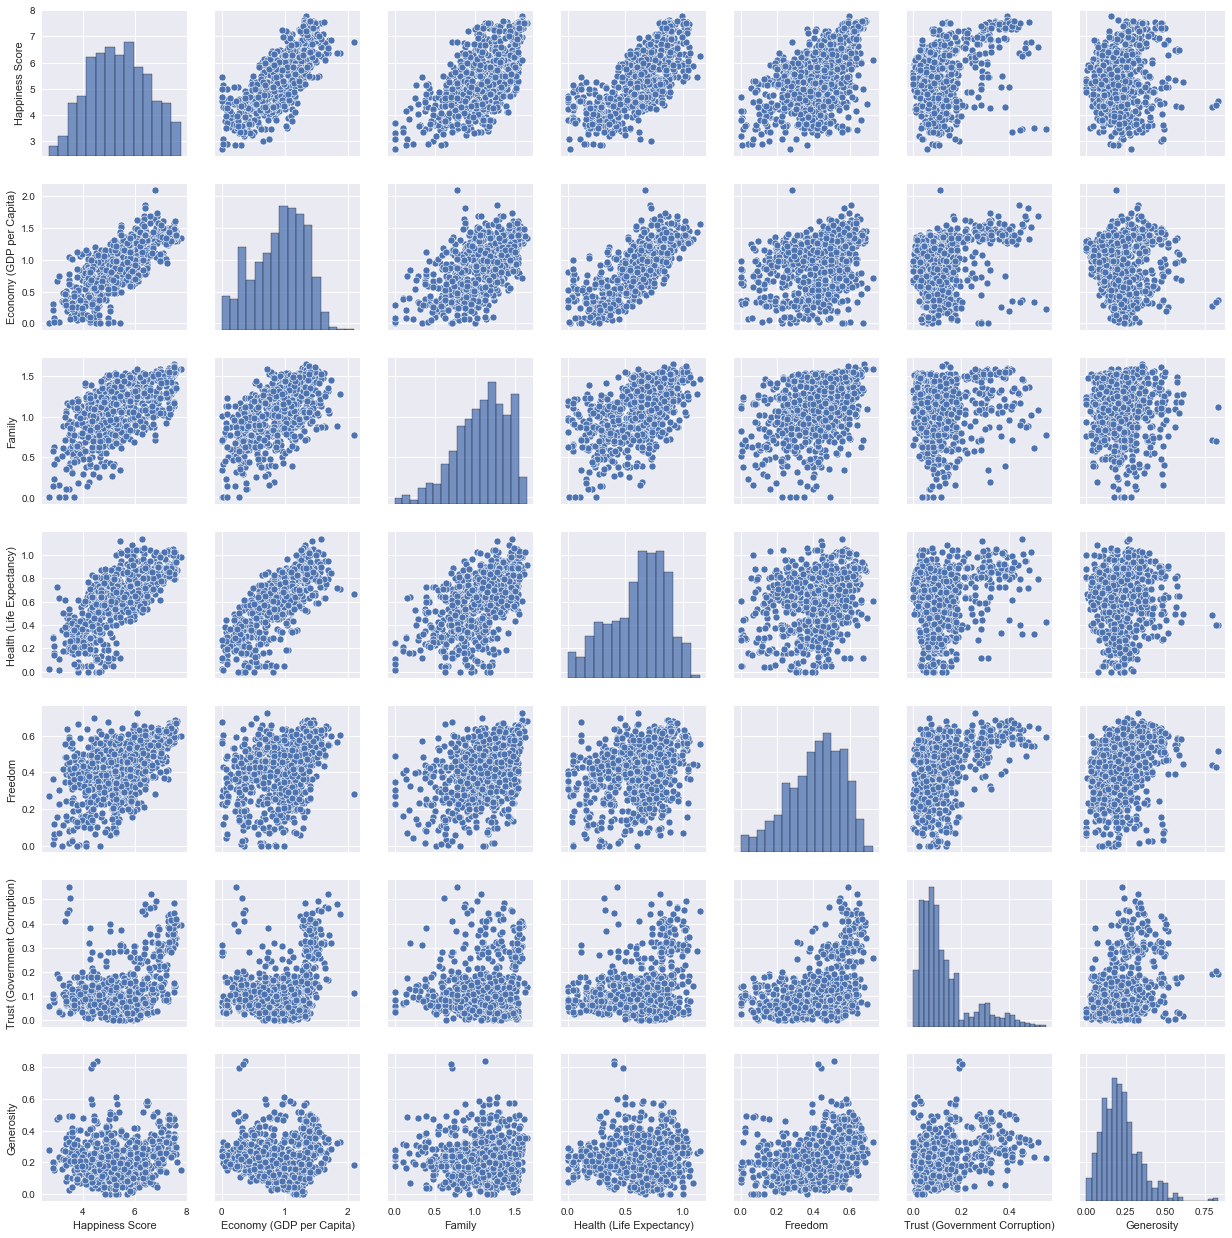

In [71]:
#Look for normality and multicollinearity
#Create a pairs plot with histogram and scatterplots
grid = sns.PairGrid(happy_df, vars=['Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity'])

grid.map_offdiag(sns.scatterplot)
grid.map_diag(sns.histplot)
#For the most part the distributions appears to be normal with the exception of Trust we will consider this in the model
#We see some predictors may be correlated with one another. We can look for this multicollinearilty when creating the model.

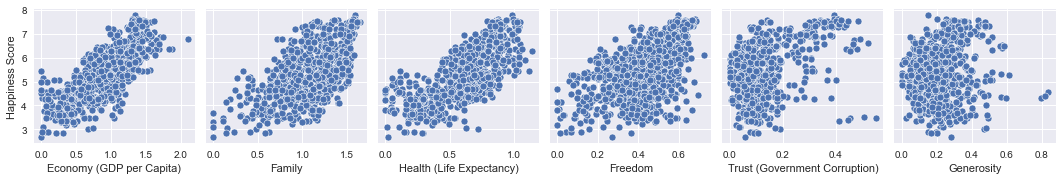

In [72]:
#Plot to get an idea of the numeric predictors relationship with Score
score_vs_all = sns.pairplot(happy_df, y_vars=['Happiness Score'], x_vars=['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
                                                                'Freedom', 'Trust (Government Corruption)', 'Generosity'])

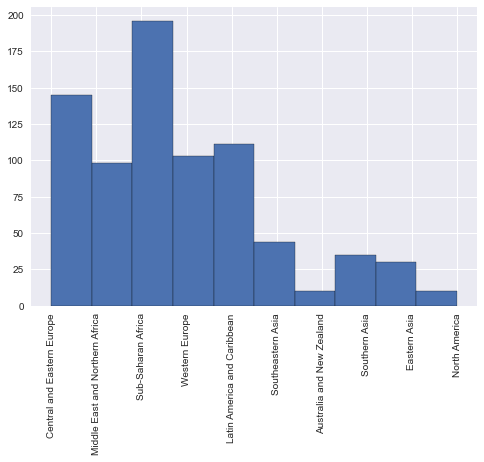

In [73]:
#Determine the distribution of Regions
plt.hist(happy_df['Region'], ec = 'black')
plt.xticks(rotation = 90)
plt.show()
#Data needs to be split using stratification due to inconsistent counts.

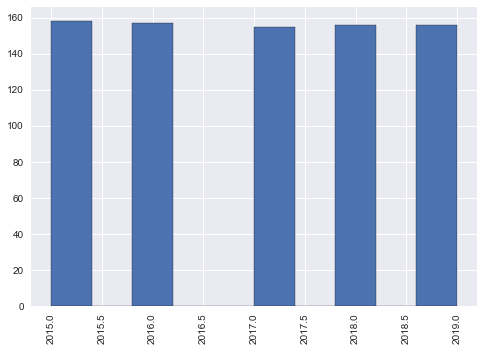

In [74]:
#Determine the distribution of Year
plt.hist(happy_df['Year'], ec = 'black')
plt.xticks(rotation = 90)
plt.show()
#Years have close to the same counts

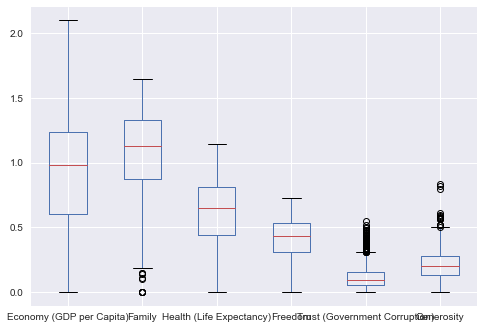

In [75]:
#Determine the range of each predictor

ax = happy_df[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']].plot(kind='box')
plt.show()

#Not a big difference. Depending on model center and scaling will not have a big impact on model. 

In [76]:
#Split the data, Stratifing on Region
from sklearn.model_selection import train_test_split 
train, test = train_test_split(happy_df, test_size=0.25, stratify=happy_df['Region'])

In [77]:
#Checking proportions from split
print(train['Region'].value_counts())
print(test['Region'].value_counts())

Sub-Saharan Africa                 147
Central and Eastern Europe         109
Latin America and Caribbean         83
Western Europe                      77
Middle East and Northern Africa     73
Southeastern Asia                   33
Southern Asia                       26
Eastern Asia                        22
Australia and New Zealand            8
North America                        8
Name: Region, dtype: int64
Sub-Saharan Africa                 49
Central and Eastern Europe         36
Latin America and Caribbean        28
Western Europe                     26
Middle East and Northern Africa    25
Southeastern Asia                  11
Southern Asia                       9
Eastern Asia                        8
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64


In [78]:
#One hot encode the Year and Region variables
train = pd.get_dummies(data=train,columns=['Region','Year'])
test = pd.get_dummies(data=test,columns=['Region','Year'])
print(train.columns)

Index(['Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Region_Australia and New Zealand',
       'Region_Central and Eastern Europe', 'Region_Eastern Asia',
       'Region_Latin America and Caribbean',
       'Region_Middle East and Northern Africa', 'Region_North America',
       'Region_Southeastern Asia', 'Region_Southern Asia',
       'Region_Sub-Saharan Africa', 'Region_Western Europe', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Year_2019'],
      dtype='object')


In [55]:
#Export train and test
train.to_csv('train.csv', index = False)
test.to_csv('test.csv', index = False)